In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
N = 6
S = 8
I1 = 5
I2 = 4

print(f"""
N = {N}
S = {S}
I1 = {I1}
I2 = {I2}
""")


N = 6
S = 8
I1 = 5
I2 = 4



### Task A

In [44]:
a = N / (N + S)
b = S
sample_size = (1 + N) * 10
B = 100 * sample_size
alpha = 0.1

print(f"""
a = {a}
b = {b}
sample_size = {sample_size}
B = {B}
alpha = {alpha}
""")


a = 0.42857142857142855
b = 8
sample_size = 70
B = 7000
alpha = 0.1




Parametric Bootstrap vs True Distribution
Statistic: 0.00884, p-value: 0.64088
Reject the null hypothesis: False

Nonparametric Bootstrap vs True Distribution
Statistic: 0.02376, p-value: 0.00073
Reject the null hypothesis: True


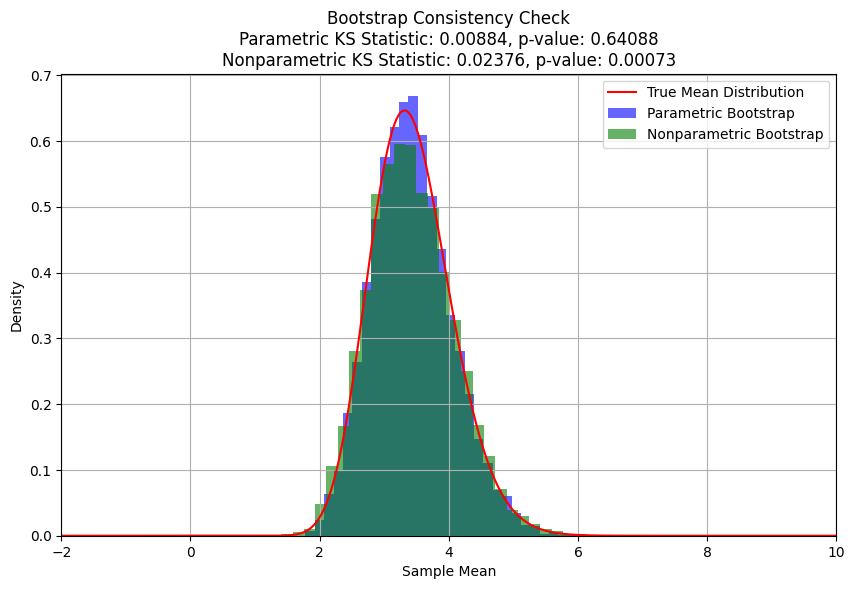

In [51]:
F1 = stats.gamma.rvs(a, scale=b, size=sample_size)
shape, _, scale = stats.gamma.fit(F1, floc=0)

p_means, np_means = [], []
for _ in range(B):
    # Parametric bootstrap
    p_sample = stats.gamma.rvs(shape, scale=scale, size=sample_size)
    p_means.append(np.mean(p_sample))
    # Non-parametric bootstrap
    np_sample = np.random.choice(F1, size=sample_size, replace=True)
    np_means.append(np.mean(np_sample))

p_means = np.array(p_means)
np_means = np.array(np_means)

true_distribution = stats.gamma(a=sample_size * a, scale=b / sample_size)
statistic_p, p_value_p = stats.kstest(p_means, true_distribution.cdf)
statistic_np, p_value_np = stats.kstest(np_means, true_distribution.cdf)

print("\nParametric Bootstrap vs True Distribution")
print(f"Statistic: {statistic_p:.5f}, p-value: {p_value_p:.5f}")
print("Reject the null hypothesis:", p_value_p < alpha)

print("\nNonparametric Bootstrap vs True Distribution")
print(f"Statistic: {statistic_np:.5f}, p-value: {p_value_np:.5f}")
print("Reject the null hypothesis:", p_value_np < alpha)

plt.figure(figsize=(10, 6))

x = np.linspace(-100, 100, 10000)
plt.plot(x, true_distribution.pdf(x), "r-", label="True Mean Distribution")
plt.hist(p_means, bins=30, density=True, alpha=0.6, color="blue", label="Parametric Bootstrap")
plt.hist(np_means, bins=30, density=True, alpha=0.6, color="green", label="Nonparametric Bootstrap")

plt.title(
    f"Bootstrap Consistency Check\n"
    f"Parametric KS Statistic: {statistic_p:.5f}, p-value: {p_value_p:.5f}\n"
    f"Nonparametric KS Statistic: {statistic_np:.5f}, p-value: {p_value_np:.5f}"
)
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.xlim(-2, 10)
plt.show()

### Task B


In [5]:
c = S
d = N / (N + S)
sample_size = (1 + N) * 10
B = 100 * sample_size
alpha = 0.1

print(f"""
c = {c}
d = {d}
sample_size = {sample_size}
B = {B}
alpha = {alpha}
""")


c = 8
d = 0.42857142857142855
sample_size = 70
B = 7000
alpha = 0.1



In [63]:
F2 = stats.pareto.rvs(b=d, scale=c, size=sample_size)
shape, _, scale = stats.pareto.fit(F2, floc=0)

p_means, np_means, mc_means = [], [], []
for _ in range(B):
    # Parametric bootstrap
    p_sample = stats.pareto.rvs(shape, scale=scale, size=sample_size)
    p_means.append(np.mean(p_sample))
    # Non-parametric bootstrap
    np_sample = np.random.choice(F2, size=sample_size, replace=True)
    np_means.append(np.mean(np_sample))
    # Monte Carlo
    mc_sample = stats.pareto.rvs(b=d, scale=c, size=sample_size)
    mc_means.append(np.mean(mc_sample))

p_means = np.array(p_means)
np_means = np.array(np_means)
mc_means = np.array(mc_means)

statistic_p, p_value_p = stats.ks_2samp(mc_means, p_means)
statistic_np, p_value_np = stats.ks_2samp(mc_means, np_means)

print("\nParametric Bootstrap vs True Distribution")
print(f"Statistic: {statistic_p:.5f}, p-value: {p_value_p:.5f}")
print("Reject the null hypothesis:", p_value_p < alpha)

print("\nNonparametric Bootstrap vs True Distribution")
print(f"Statistic: {statistic_np:.5f}, p-value: {p_value_np:.5f}")
print("Reject the null hypothesis:", p_value_p < alpha)


Parametric Bootstrap vs True Distribution
Statistic: 0.35914, p-value: 0.00000
Reject the null hypothesis: True

Nonparametric Bootstrap vs True Distribution
Statistic: 0.99243, p-value: 0.00000
Reject the null hypothesis: True
